In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, ARDRegression, SGDRegressor, PassiveAggressiveRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
# from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from models import FONN1, FONN2, TREENN1, TREENN2

In [2]:
# Load the Boston dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None) # type: ignore
X = np.hstack([raw_df.values[::2, :-1], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

scaler = StandardScaler()
X = scaler.fit_transform(X)
X[:5], X.shape, y[:5], y.shape

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_201604/4169947569.py:3: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None) # type: ignore


(array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
          0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
          0.44105193, -1.0755623 ],
        [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
          0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
          0.44105193, -0.49243937],
        [-0.41734159, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
          1.28271368, -0.26581176,  0.55715988, -0.8678825 , -0.98732948,
          0.39642699, -1.2087274 ],
        [-0.41675042, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
          1.01630251, -0.80988851,  1.07773662, -0.75292215, -1.10611514,
          0.41616284, -1.36151682],
        [-0.41248185, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
          1.22857665, -0.51117971,  1.07773662, -0.75292215, -1.10611514,
          0.44105193, -1.02650148]]),
 (506, 12),
 array([24. , 21.6, 34.7, 33.4, 36.2]),
 (506,))

In [3]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[:5], X_train.shape, X_test[:5], X_test.shape, y_train[:5], y_train.shape, y_test[:5], y_test.shape

(array([[ 1.32780421e+00, -4.87722365e-01,  1.01599907e+00,
         -2.72598567e-01,  5.12295652e-01, -1.39706929e+00,
          1.02148094e+00, -8.05438224e-01,  1.66124525e+00,
          1.53092646e+00, -7.88779407e-02,  1.71810120e+00],
        [-3.47506015e-01, -4.87722365e-01, -4.37258013e-01,
         -2.72598567e-01, -1.44217433e-01, -6.42000190e-01,
         -4.29390392e-01,  3.34449434e-01, -6.37961799e-01,
         -6.01276097e-01,  4.27017554e-01, -5.86355801e-01],
        [-4.16483921e-01,  1.01446252e+00, -7.40749452e-01,
         -2.72598567e-01, -1.00891427e+00, -3.61342430e-01,
         -1.61000138e+00,  1.35273767e+00, -9.82842857e-01,
         -6.19093946e-01,  6.11369155e-02, -6.76067022e-01],
        [ 3.99962749e-01, -4.87722365e-01,  1.01599907e+00,
         -2.72598567e-01,  5.12295652e-01, -2.58767006e-01,
          5.87641964e-01, -8.42944849e-01,  1.66124525e+00,
          1.53092646e+00, -3.88307172e+00,  1.49101967e+00],
        [-3.36053725e-01, -4.8772236

In [4]:
# Function to train and evaluate a model
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    end_time = time.time()

    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    comp_time = end_time - start_time

    return r2, mae, mse, comp_time


# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    # "Ridge Regression": Ridge(),
    # "Lasso Regression": Lasso(),
    # "ElasticNet Regression": ElasticNet(),
    # "Bayesian Ridge Regression": BayesianRidge(),
    # "ARD Regression": ARDRegression(),
    # "SGD Regressor": SGDRegressor(),
    # "Passive Aggressive Regressor": PassiveAggressiveRegressor(),
    # "Support Vector Regression": SVR(),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    # "XGBoost Regressor": XGBRegressor(random_state=42),
    # "AdaBoost Regressor": AdaBoostRegressor(random_state=42),
    # "Bagging Regressor": BaggingRegressor(random_state=42),
    # "ExtraTrees Regressor": ExtraTreesRegressor(random_state=42),
    # "HistGradientBoosting Regressor": HistGradientBoostingRegressor(random_state=42),
    # "Stacking Regressor": StackingRegressor(estimators=[
    #     ('lr', LinearRegression()),
    #     ('rf', RandomForestRegressor(n_estimators=10, random_state=42))
    # ], final_estimator=Ridge()),
    # "Voting Regressor": VotingRegressor(estimators=[
    #     ('lr', LinearRegression()),
    #     ('rf', RandomForestRegressor(n_estimators=10, random_state=42)),
    #     ('gb', GradientBoostingRegressor(random_state=42))
    # ])
}

# Train and evaluate models
results = {}
for name, model in models.items():
    r2, mae, mse, comp_time = train_evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {"R² Score": r2, "MAE": mae, "MSE": mse, "Time (s)": comp_time}

In [5]:
# Initialize and train FONN1
input_dim = X_train.shape[1]
hidden_dim = 10  # Increased hidden layer size
output_dim = 1
num_trees_input = 10
epochs = 2000
learning_rate = 0.005

fonn1 = FONN1(input_dim, hidden_dim, output_dim, num_trees_input)
fonn1.train(X_train, y_train, epochs, learning_rate)

Epoch 0, Loss: 606.0829441109694
Epoch 100, Loss: 383.4293951246202
Epoch 200, Loss: 224.23624444877308
Epoch 300, Loss: 122.31667176298266
Epoch 400, Loss: 66.56446125283382
Epoch 500, Loss: 44.603449971361435
Epoch 600, Loss: 37.687872856605416
Epoch 700, Loss: 33.96909036272981
Epoch 800, Loss: 31.2409080913402
Epoch 900, Loss: 29.034112169946155
Epoch 1000, Loss: 27.250896664428524
Epoch 1100, Loss: 25.89073864956366
Epoch 1200, Loss: 24.93356817481654
Epoch 1300, Loss: 24.152980086157168
Epoch 1400, Loss: 23.55393036836609
Epoch 1500, Loss: 23.052058983860476
Epoch 1600, Loss: 22.63297474205819
Epoch 1700, Loss: 22.278111159547958
Epoch 1800, Loss: 21.966773024583762
Epoch 1900, Loss: 21.674046674301657


In [6]:
# Initialize and train FONN2
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1
num_trees_hidden = 10
epochs = 1000
learning_rate = 0.001

fonn2 = FONN2(input_dim, hidden_dim, output_dim, num_trees_hidden)
fonn2.train(X_train, y_train, epochs, learning_rate)

Epoch 0, Loss: 546.3470376664583
Epoch 100, Loss: 7.088832839682727
Epoch 200, Loss: 7.088228597579397
Epoch 300, Loss: 7.0874754108312805
Epoch 400, Loss: 7.086556561763684
Epoch 500, Loss: 7.085453790984993
Epoch 600, Loss: 7.084147325203486
Epoch 700, Loss: 7.082616003874303
Epoch 800, Loss: 7.080837525147923
Epoch 900, Loss: 7.078788831646377


In [7]:
# Initialize and train TREENN1
input_dim = X_train.shape[1]
hidden_dim = 10  # Hidden layer size
output_dim = 1
epochs = 2000
learning_rate = 0.005

# Initialize and train TREENN1
treenn1 = TREENN1(input_dim, hidden_dim, output_dim)
treenn1.train(X_train, y_train, epochs, learning_rate)

Epoch 0, Loss: 607.2586519808042
Epoch 100, Loss: 387.0495539163886
Epoch 200, Loss: 226.64286341659613
Epoch 300, Loss: 125.92558189123801
Epoch 400, Loss: 66.5125011967956
Epoch 500, Loss: 38.96783080723611
Epoch 600, Loss: 24.272168372486192
Epoch 700, Loss: 18.51887436029211
Epoch 800, Loss: 15.962985227907225
Epoch 900, Loss: 13.78752559132881
Epoch 1000, Loss: 12.102091288178462
Epoch 1100, Loss: 10.876782178218612
Epoch 1200, Loss: 9.984800644034022
Epoch 1300, Loss: 9.321670199453154
Epoch 1400, Loss: 8.807970189224072
Epoch 1500, Loss: 8.402023481976595
Epoch 1600, Loss: 8.077283568741608
Epoch 1700, Loss: 7.81145876247581
Epoch 1800, Loss: 7.585458028584762
Epoch 1900, Loss: 7.389177941218882


In [8]:
# Initialize and train TREENN2
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1
epochs = 1000
learning_rate = 0.001

treenn2 = TREENN2(input_dim, hidden_dim, output_dim)
treenn2.train(X_train, y_train, epochs, learning_rate)

Epoch 0, Loss: 637.1716913682515
Epoch 100, Loss: 514.4042937879436
Epoch 200, Loss: 396.1343344914128
Epoch 300, Loss: 286.9407814983824
Epoch 400, Loss: 192.86131123303113
Epoch 500, Loss: 115.93743464331715
Epoch 600, Loss: 57.93239599752343
Epoch 700, Loss: 21.177315136687035
Epoch 800, Loss: 7.875659890988683
Epoch 900, Loss: 7.448263186881161


In [9]:
# Measure computational time and evaluate the FONN1 model
start_time = time.time()
fonn1_predictions = fonn1.forward(X_test)
end_time = time.time()
fonn1_r2 = r2_score(y_test, fonn1_predictions)
fonn1_mae = mean_absolute_error(y_test, fonn1_predictions)
fonn1_mse = mean_squared_error(y_test, fonn1_predictions)
fonn1_time = end_time - start_time

results["FONN1"] = {"R² Score": fonn1_r2, "MAE": fonn1_mae, "MSE": fonn1_mse, "Time (s)": fonn1_time}

In [10]:
# Measure computational time and evaluate the custom MLP model
start_time = time.time()
custom_predictions = fonn2.forward(X_test)
end_time = time.time()
custom_r2 = r2_score(y_test, custom_predictions)
custom_mae = mean_absolute_error(y_test, custom_predictions)
custom_mse = mean_squared_error(y_test, custom_predictions)
custom_time = end_time - start_time

results["FONN2"] = {"R² Score": custom_r2, "MAE": custom_mae, "MSE": custom_mse, "Time (s)": custom_time}

# Measure computational time and predict house prices using the decision trees in the hidden layer
start_time = time.time()
tree_based_predictions = fonn2.tree_predict(X_test)
end_time = time.time()
tree_based_r2 = r2_score(y_test, tree_based_predictions)
tree_based_mae = mean_absolute_error(y_test, tree_based_predictions)
tree_based_mse = mean_squared_error(y_test, tree_based_predictions)
tree_based_time = end_time - start_time

results["Tree-based Predictions (FONN2)"] = {"R² Score": tree_based_r2, "MAE": tree_based_mae, "MSE": tree_based_mse, "Time (s)": tree_based_time}

# Combine 10 decision trees and evaluate the ensemble model
trees = [DecisionTreeRegressor(max_depth=5, random_state=i) for i in range(10)]

for tree in trees:
    tree.fit(X_train, y_train)

ensemble_predictions = np.mean([tree.predict(X_test) for tree in trees], axis=0)
ensemble_r2 = r2_score(y_test, ensemble_predictions)
ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
ensemble_time = sum([train_evaluate_model(tree, X_train, X_test, y_train, y_test)[3] for tree in trees])

results["Ensemble of 10 Trees (FONN2)"] = {"R² Score": ensemble_r2, "MAE": ensemble_mae, "MSE": ensemble_mse, "Time (s)": ensemble_time}

In [11]:
# Measure computational time and evaluate the TREENN1 model
start_time = time.time()
treenn1_predictions = treenn1.forward(X_test)
end_time = time.time()
treenn1_r2 = r2_score(y_test, treenn1_predictions)
treenn1_mae = mean_absolute_error(y_test, treenn1_predictions)
treenn1_mse = mean_squared_error(y_test, treenn1_predictions)
treenn1_time = end_time - start_time

results["TREENN1"] = {"R² Score": treenn1_r2, "MAE": treenn1_mae, "MSE": treenn1_mse, "Time (s)": treenn1_time}

In [12]:
# Measure computational time and evaluate the custom MLP model
start_time = time.time()
custom_predictions = treenn2.forward(X_test)
end_time = time.time()
custom_r2 = r2_score(y_test, custom_predictions)
custom_mae = mean_absolute_error(y_test, custom_predictions)
custom_mse = mean_squared_error(y_test, custom_predictions)
custom_time = end_time - start_time

results["TREENN2"] = {"R² Score": custom_r2, "MAE": custom_mae, "MSE": custom_mse, "Time (s)": custom_time}

# Measure computational time and predict house prices using the decision tree in the hidden layer
start_time = time.time()
tree_based_predictions = treenn2.tree_predict(X_test)
end_time = time.time()
tree_based_r2 = r2_score(y_test, tree_based_predictions)
tree_based_mae = mean_absolute_error(y_test, tree_based_predictions)
tree_based_mse = mean_squared_error(y_test, tree_based_predictions)
tree_based_time = end_time - start_time

results["Tree-based Predictions (TREENN2)"] = {"R² Score": tree_based_r2, "MAE": tree_based_mae, "MSE": tree_based_mse, "Time (s)": tree_based_time}

In [13]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
results_df

,R² Score,MAE,MSE,Time (s)
Linear Regression,0.629049,3.530902,27.203240,0.007272
MLP Regressor,0.754212,3.019009,18.024539,0.332069
Random Forest Regressor,0.886802,2.115863,8.301222,0.231533
Gradient Boosting Regressor,0.917226,1.899354,6.070106,0.095266
FONN1,0.672681,3.076653,24.003561,0.003636
FONN2,0.833845,2.471134,12.184755,0.001884
Tree-based Predictions (FONN2),0.833933,2.456882,12.178347,0.002297
Ensemble of 10 Trees (FONN2),0.833933,2.456882,12.178347,0.021236
TREENN1,0.795266,2.576418,15.013889,0.001853
TREENN2,0.747588,2.632954,18.510324,0.001949


Tree 0 feature importances:
[4.68668186e-02 0.00000000e+00 7.01856623e-03 0.00000000e+00
 4.73499974e-03 6.29222250e-01 6.17612617e-03 7.27222195e-02
 0.00000000e+00 1.66970863e-02 5.42729365e-04 2.16019204e-01]
Tree 0 structure:
|--- feature_5 <= 0.94
|   |--- feature_11 <= 0.24
|   |   |--- feature_7 <= -1.15
|   |   |   |--- feature_0 <= 0.76
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_0 >  0.76
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  -1.15
|   |   |   |--- feature_5 <= 0.37
|   |   |   |   |--- feature_5 <= -0.27
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  -0.27
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  0.37
|   |   |   |   |--- feature_11 <= -0.96
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  -0.96
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  0.24
|   |   |--- feature_0 <= 0.39
|   |   |   |--- feature_6 <= 0.17
|   |   |   |   |--- featur

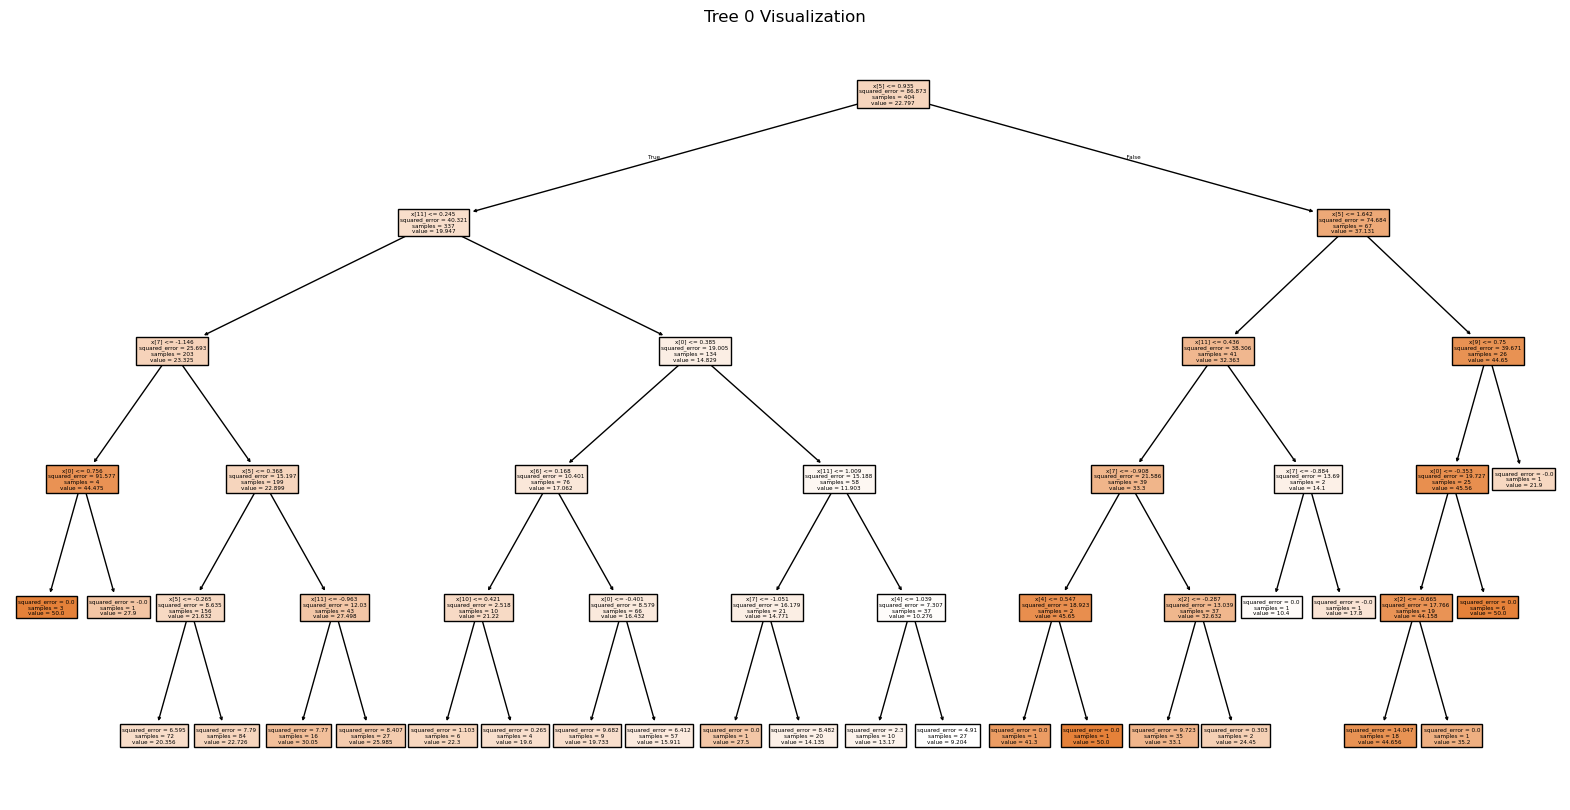

Tree 1 feature importances:
[5.22009741e-02 0.00000000e+00 7.01856623e-03 0.00000000e+00
 4.41037338e-03 6.29222250e-01 6.17612617e-03 7.18728865e-02
 0.00000000e+00 1.17395935e-03 5.42729365e-04 2.27382135e-01]
Tree 1 structure:
|--- feature_5 <= 0.94
|   |--- feature_11 <= 0.24
|   |   |--- feature_7 <= -1.15
|   |   |   |--- feature_11 <= -0.30
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_11 >  -0.30
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  -1.15
|   |   |   |--- feature_5 <= 0.37
|   |   |   |   |--- feature_5 <= -0.27
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  -0.27
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  0.37
|   |   |   |   |--- feature_11 <= -0.96
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  -0.96
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  0.24
|   |   |--- feature_0 <= 0.39
|   |   |   |--- feature_6 <= 0.17
|   |   |   |   |--- fe

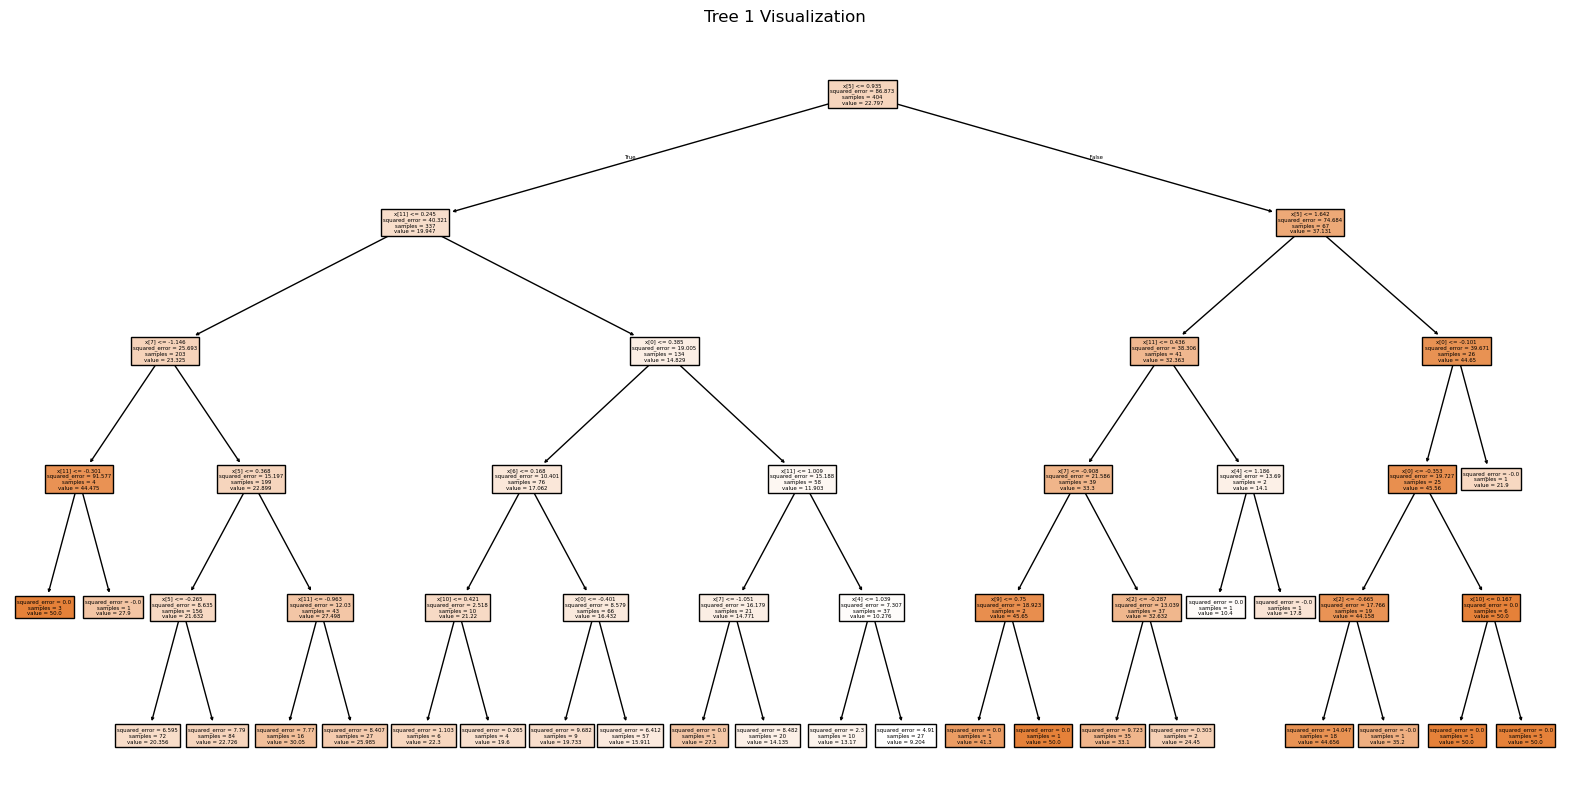

Tree 2 feature importances:
[0.08531884 0.         0.00701857 0.         0.00356104 0.63449932
 0.00702546 0.06659581 0.         0.         0.00171669 0.19426427]
Tree 2 structure:
|--- feature_5 <= 0.94
|   |--- feature_11 <= 0.24
|   |   |--- feature_7 <= -1.15
|   |   |   |--- feature_0 <= 0.76
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_0 >  0.76
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  -1.15
|   |   |   |--- feature_5 <= 0.37
|   |   |   |   |--- feature_5 <= -0.27
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  -0.27
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  0.37
|   |   |   |   |--- feature_11 <= -0.96
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  -0.96
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  0.24
|   |   |--- feature_0 <= 0.39
|   |   |   |--- feature_6 <= 0.17
|   |   |   |   |--- feature_10 <= 0.42
|   |   |   |   |   |--- value: [22.

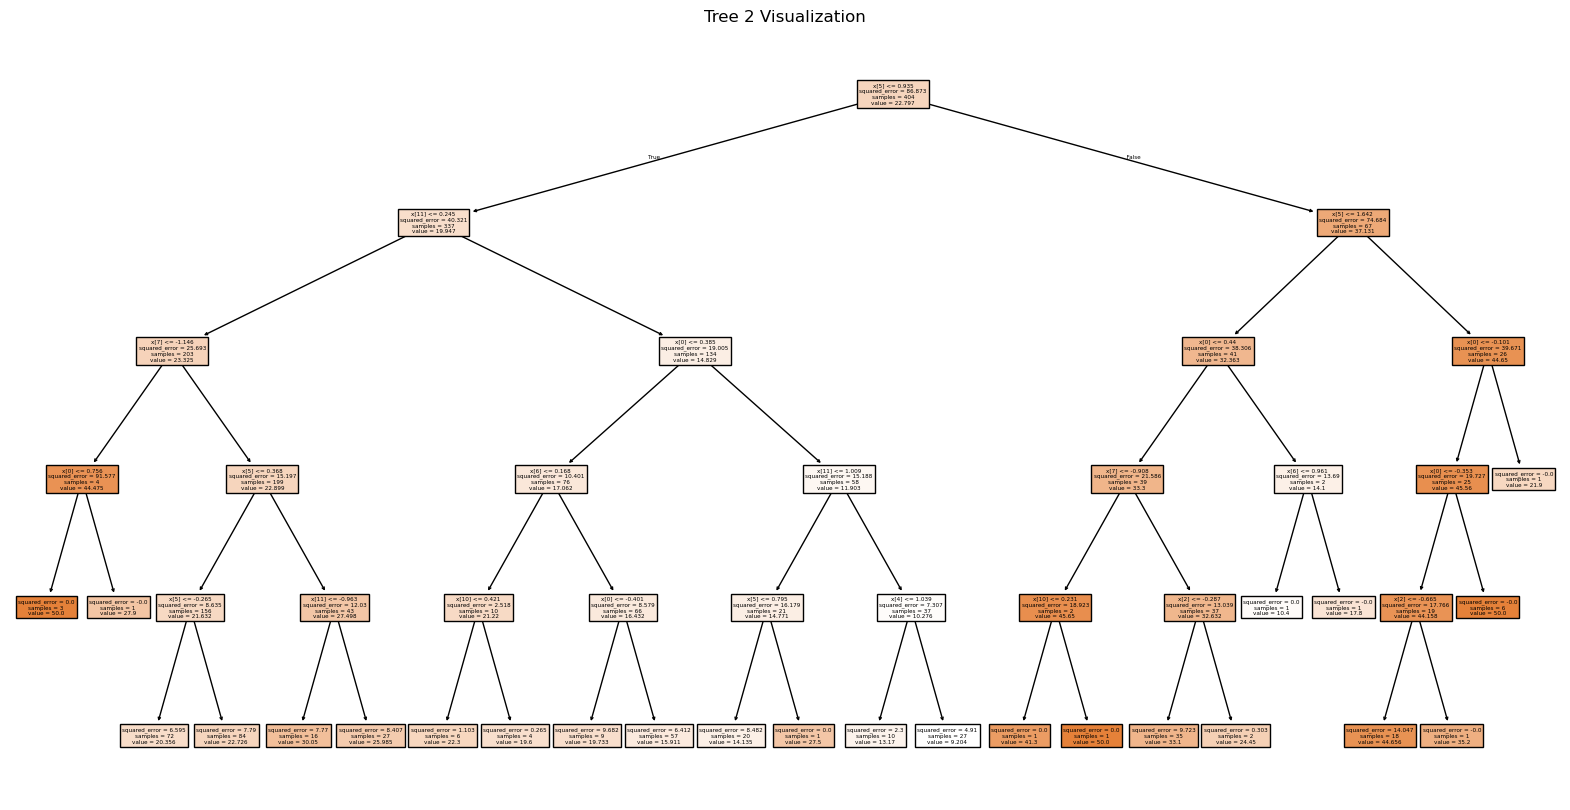

Tree 3 feature importances:
[7.39559073e-02 0.00000000e+00 7.01856623e-03 0.00000000e+00
 4.41037338e-03 6.34499324e-01 6.17612617e-03 6.77697719e-02
 0.00000000e+00 0.00000000e+00 5.42729365e-04 2.05627202e-01]
Tree 3 structure:
|--- feature_5 <= 0.94
|   |--- feature_11 <= 0.24
|   |   |--- feature_7 <= -1.15
|   |   |   |--- feature_11 <= -0.30
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_11 >  -0.30
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  -1.15
|   |   |   |--- feature_5 <= 0.37
|   |   |   |   |--- feature_5 <= -0.27
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  -0.27
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  0.37
|   |   |   |   |--- feature_11 <= -0.96
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  -0.96
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  0.24
|   |   |--- feature_0 <= 0.39
|   |   |   |--- feature_6 <= 0.17
|   |   |   |   |--- fe

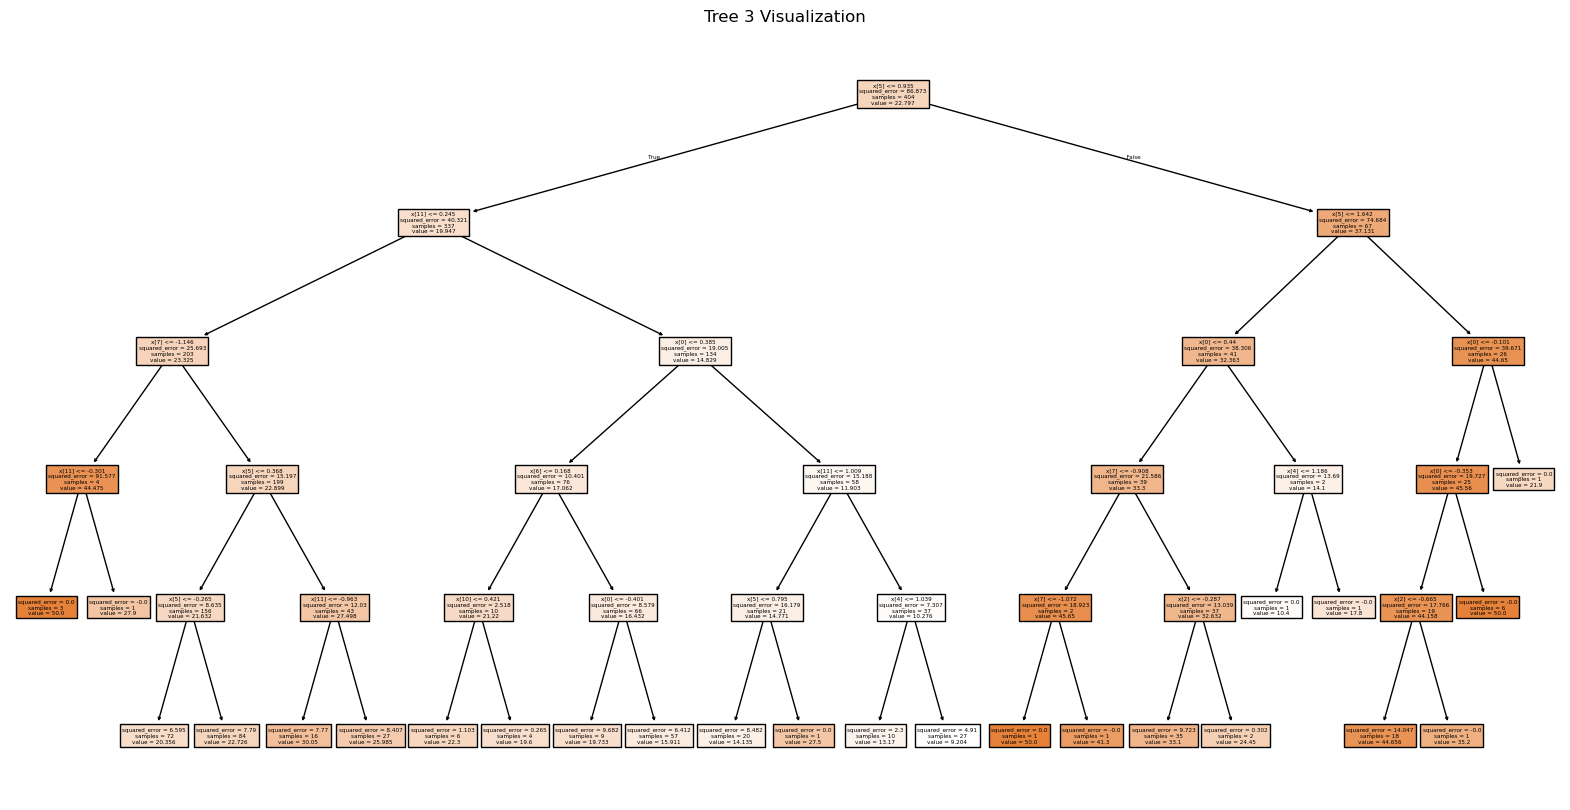

Tree 4 feature importances:
[0.05220097 0.         0.00701857 0.         0.004735   0.63007158
 0.00617613 0.07187289 0.         0.         0.01190566 0.2160192 ]
Tree 4 structure:
|--- feature_5 <= 0.94
|   |--- feature_11 <= 0.24
|   |   |--- feature_7 <= -1.15
|   |   |   |--- feature_10 <= -0.18
|   |   |   |   |--- value: [27.90]
|   |   |   |--- feature_10 >  -0.18
|   |   |   |   |--- value: [50.00]
|   |   |--- feature_7 >  -1.15
|   |   |   |--- feature_5 <= 0.37
|   |   |   |   |--- feature_5 <= -0.27
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  -0.27
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  0.37
|   |   |   |   |--- feature_11 <= -0.96
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  -0.96
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  0.24
|   |   |--- feature_0 <= 0.39
|   |   |   |--- feature_6 <= 0.17
|   |   |   |   |--- feature_10 <= 0.42
|   |   |   |   |   |--- value: 

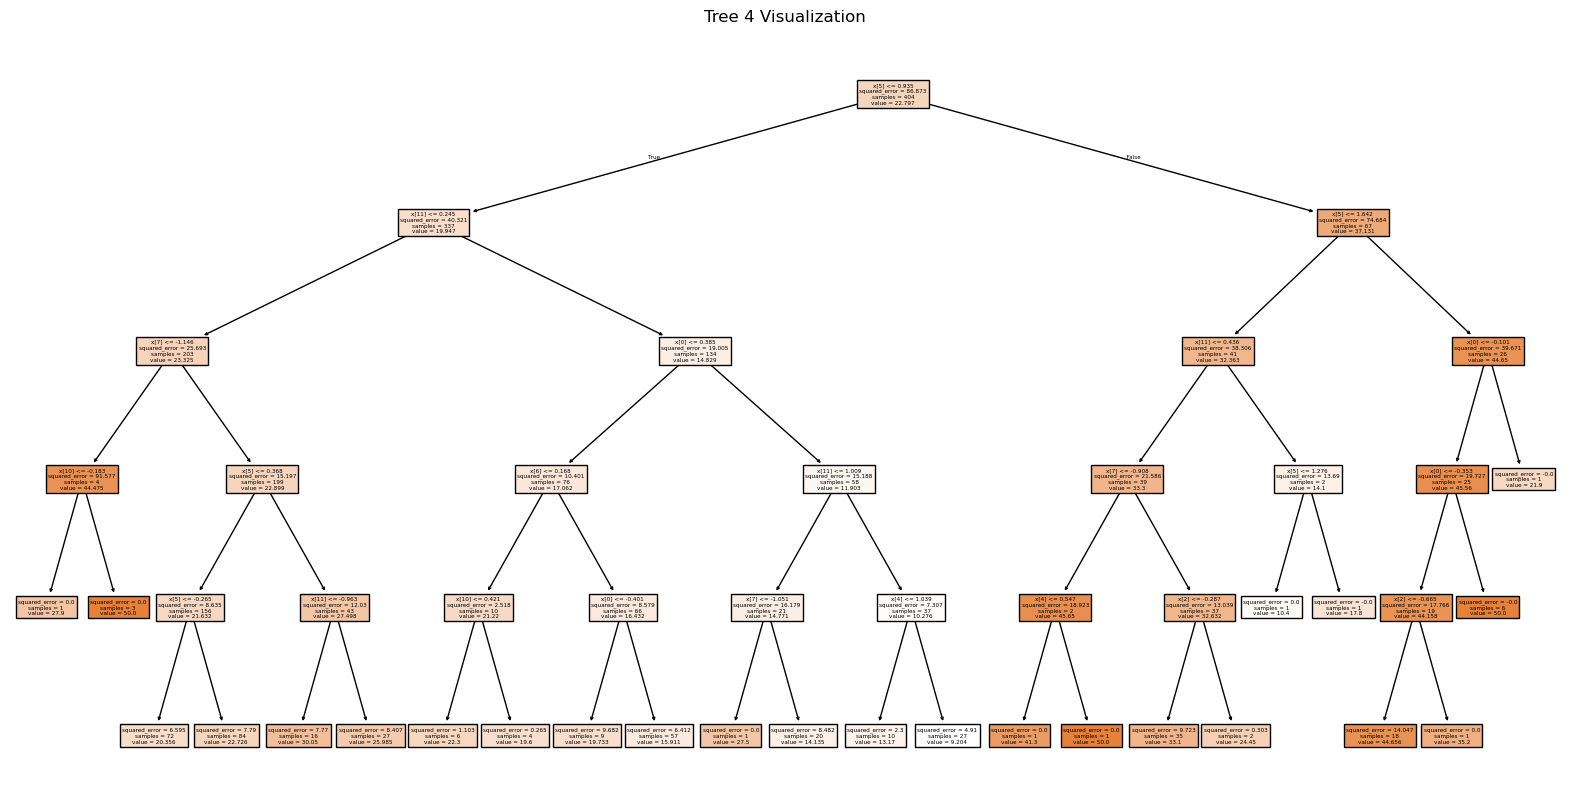

Tree 5 feature importances:
[0.05220097 0.         0.00701857 0.         0.00441037 0.63449932
 0.00735009 0.06659581 0.         0.         0.01190566 0.2160192 ]
Tree 5 structure:
|--- feature_5 <= 0.94
|   |--- feature_11 <= 0.24
|   |   |--- feature_7 <= -1.15
|   |   |   |--- feature_10 <= -0.18
|   |   |   |   |--- value: [27.90]
|   |   |   |--- feature_10 >  -0.18
|   |   |   |   |--- value: [50.00]
|   |   |--- feature_7 >  -1.15
|   |   |   |--- feature_5 <= 0.37
|   |   |   |   |--- feature_5 <= -0.27
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  -0.27
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  0.37
|   |   |   |   |--- feature_11 <= -0.96
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  -0.96
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  0.24
|   |   |--- feature_0 <= 0.39
|   |   |   |--- feature_6 <= 0.17
|   |   |   |   |--- feature_10 <= 0.42
|   |   |   |   |   |--- value: 

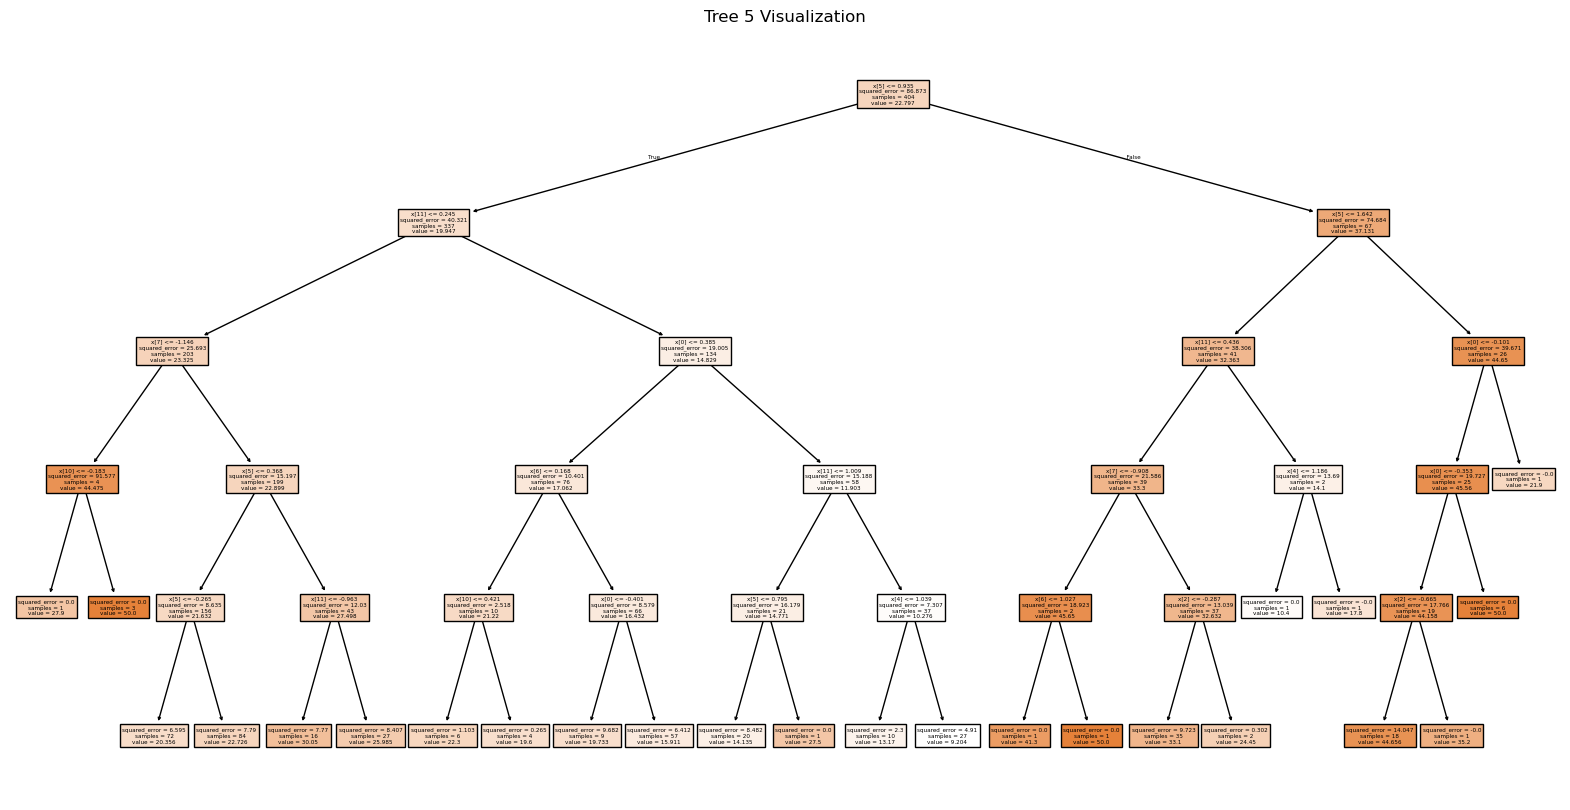

Tree 6 feature importances:
[5.22009741e-02 0.00000000e+00 7.01856623e-03 0.00000000e+00
 4.73499974e-03 6.29222250e-01 6.17612617e-03 7.27222195e-02
 0.00000000e+00 0.00000000e+00 5.42729365e-04 2.27382135e-01]
Tree 6 structure:
|--- feature_5 <= 0.94
|   |--- feature_11 <= 0.24
|   |   |--- feature_7 <= -1.15
|   |   |   |--- feature_11 <= -0.30
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_11 >  -0.30
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  -1.15
|   |   |   |--- feature_5 <= 0.37
|   |   |   |   |--- feature_5 <= -0.27
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  -0.27
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  0.37
|   |   |   |   |--- feature_11 <= -0.96
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  -0.96
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  0.24
|   |   |--- feature_0 <= 0.39
|   |   |   |--- feature_6 <= 0.17
|   |   |   |   |--- fe

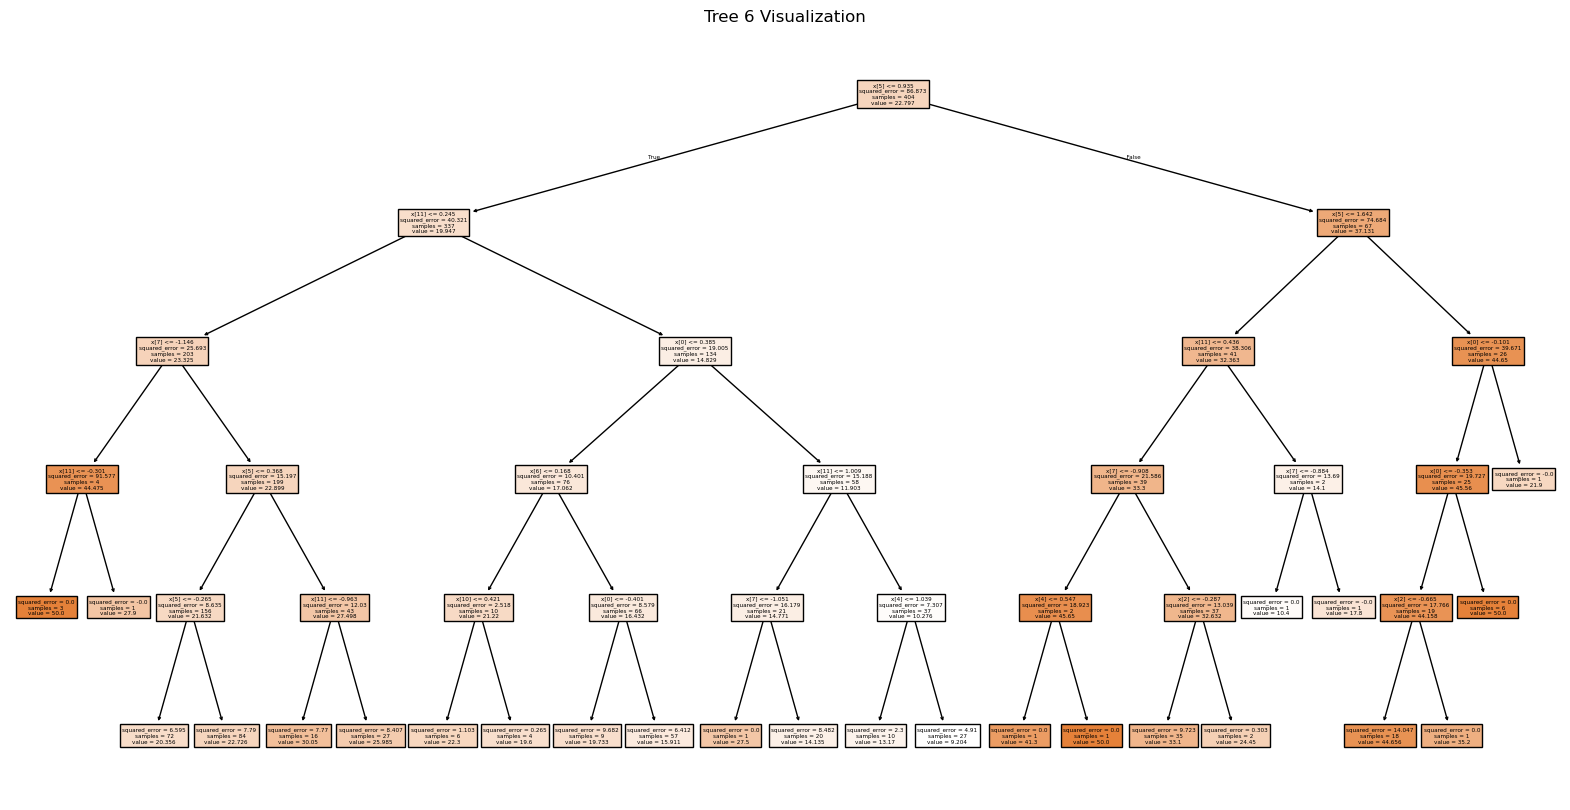

Tree 7 feature importances:
[0.05725882 0.         0.00701857 0.         0.00356104 0.6532197
 0.00617613 0.06659581 0.         0.         0.01190566 0.19426427]
Tree 7 structure:
|--- feature_5 <= 0.94
|   |--- feature_11 <= 0.24
|   |   |--- feature_7 <= -1.15
|   |   |   |--- feature_10 <= -0.18
|   |   |   |   |--- value: [27.90]
|   |   |   |--- feature_10 >  -0.18
|   |   |   |   |--- value: [50.00]
|   |   |--- feature_7 >  -1.15
|   |   |   |--- feature_5 <= 0.37
|   |   |   |   |--- feature_5 <= -0.27
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  -0.27
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  0.37
|   |   |   |   |--- feature_11 <= -0.96
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  -0.96
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  0.24
|   |   |--- feature_0 <= 0.39
|   |   |   |--- feature_6 <= 0.17
|   |   |   |   |--- feature_10 <= 0.42
|   |   |   |   |   |--- value: [

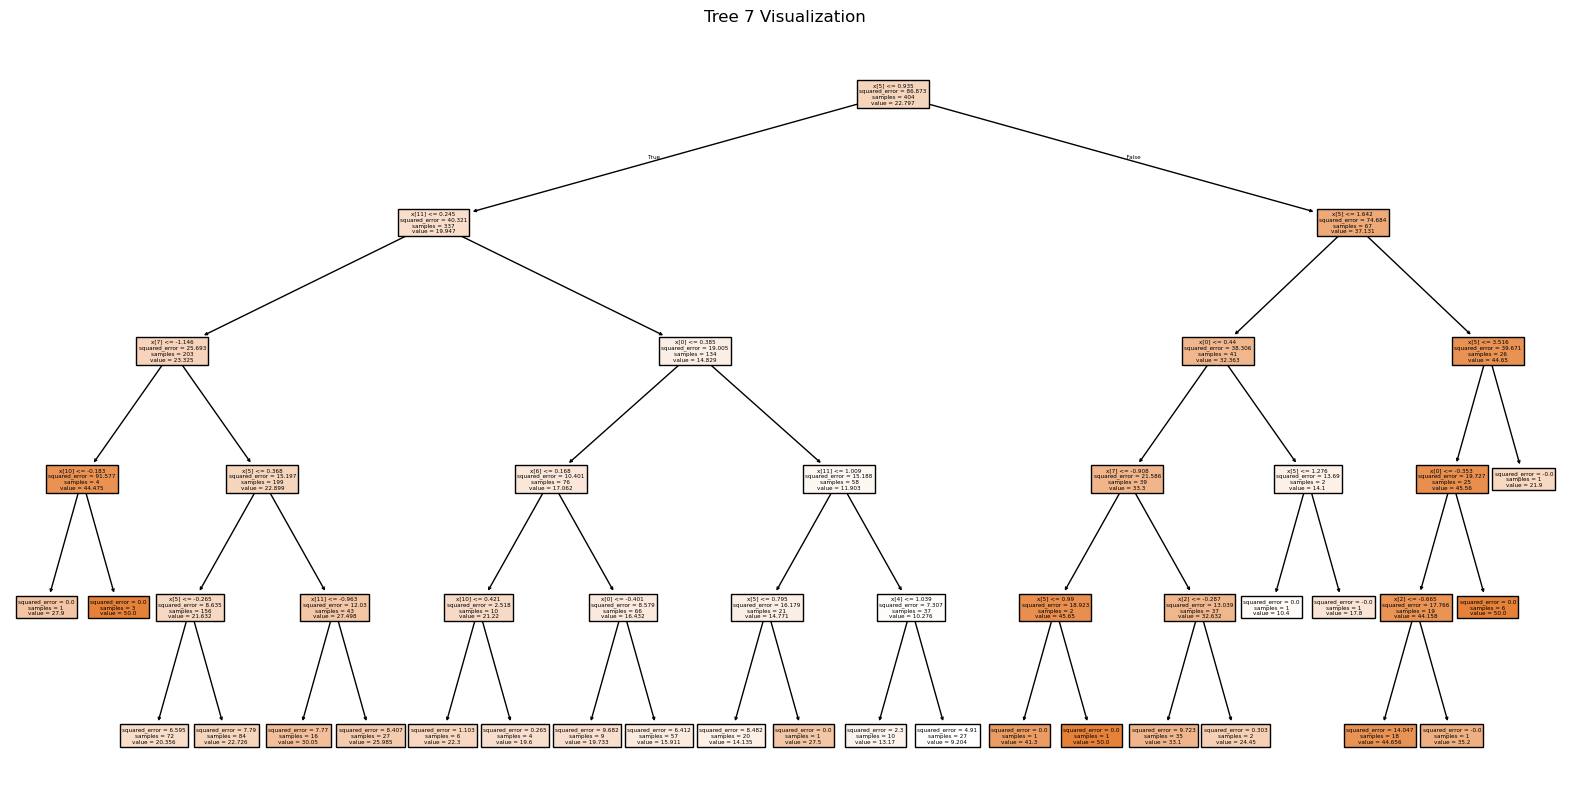

Tree 8 feature importances:
[0.03550389 0.         0.00701857 0.         0.00356104 0.62922225
 0.00702546 0.07187289 0.01669709 0.         0.01190566 0.21719316]
Tree 8 structure:
|--- feature_5 <= 0.94
|   |--- feature_11 <= 0.24
|   |   |--- feature_7 <= -1.15
|   |   |   |--- feature_10 <= -0.18
|   |   |   |   |--- value: [27.90]
|   |   |   |--- feature_10 >  -0.18
|   |   |   |   |--- value: [50.00]
|   |   |--- feature_7 >  -1.15
|   |   |   |--- feature_5 <= 0.37
|   |   |   |   |--- feature_5 <= -0.27
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  -0.27
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  0.37
|   |   |   |   |--- feature_11 <= -0.96
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  -0.96
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  0.24
|   |   |--- feature_0 <= 0.39
|   |   |   |--- feature_6 <= 0.17
|   |   |   |   |--- feature_10 <= 0.42
|   |   |   |   |   |--- value: 

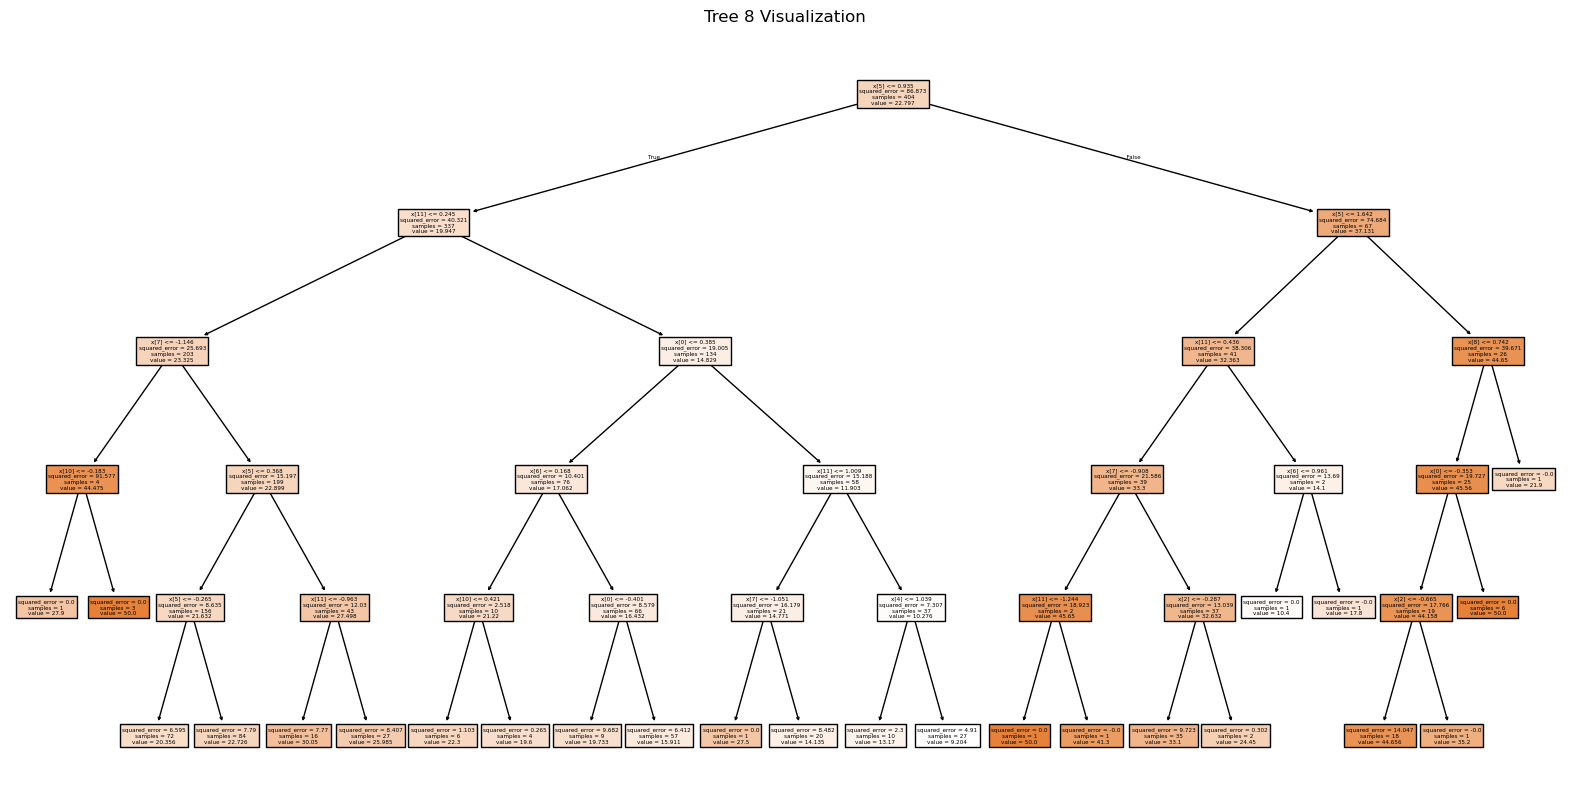

Tree 9 feature importances:
[3.55038879e-02 0.00000000e+00 7.01856623e-03 0.00000000e+00
 2.61653065e-02 6.34499324e-01 6.17612617e-03 6.65958126e-02
 1.66970863e-02 1.17395935e-03 5.42729365e-04 2.05627202e-01]
Tree 9 structure:
|--- feature_5 <= 0.94
|   |--- feature_11 <= 0.24
|   |   |--- feature_7 <= -1.15
|   |   |   |--- feature_11 <= -0.30
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_11 >  -0.30
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  -1.15
|   |   |   |--- feature_5 <= 0.37
|   |   |   |   |--- feature_5 <= -0.27
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  -0.27
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  0.37
|   |   |   |   |--- feature_11 <= -0.96
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_11 >  -0.96
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_11 >  0.24
|   |   |--- feature_0 <= 0.39
|   |   |   |--- feature_6 <= 0.17
|   |   |   |   |--- fe

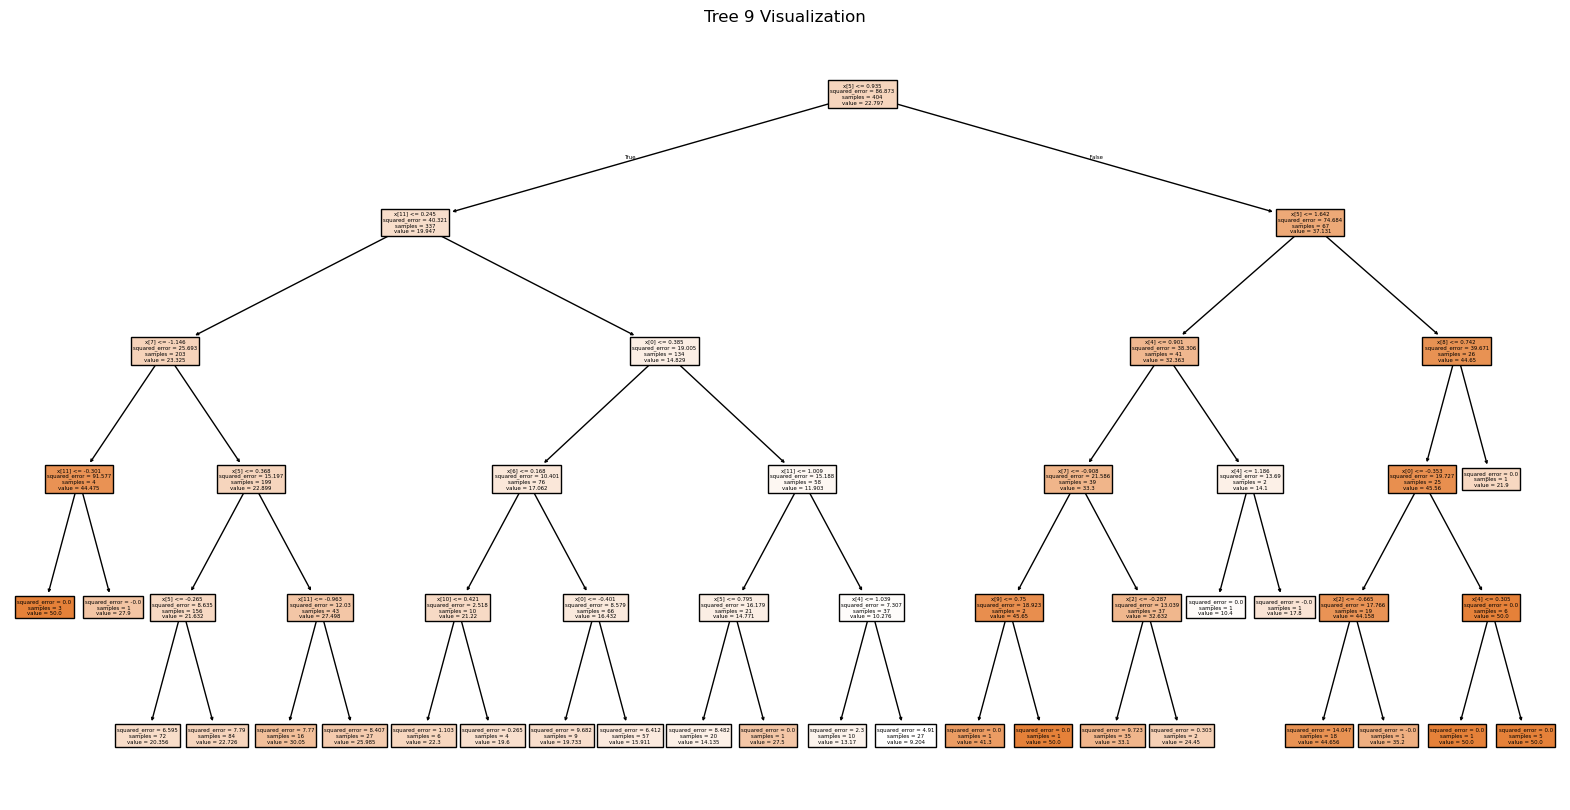

In [14]:
# Get and print tree importances
tree_importances = fonn2.get_tree_importances()